# Bank data analysis

The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  
Make feature engineering but also try differnet models in order to get as much accuracy as possible.


In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sns
import missingno #find missing data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint as sp_randint
import datetime

%matplotlib inline

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Read data

In [3]:
#read data
data = pd.read_csv('dataset.csv',sep = ';')  
# visualize the data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data = data.replace('unknown', np.nan)

In [5]:
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

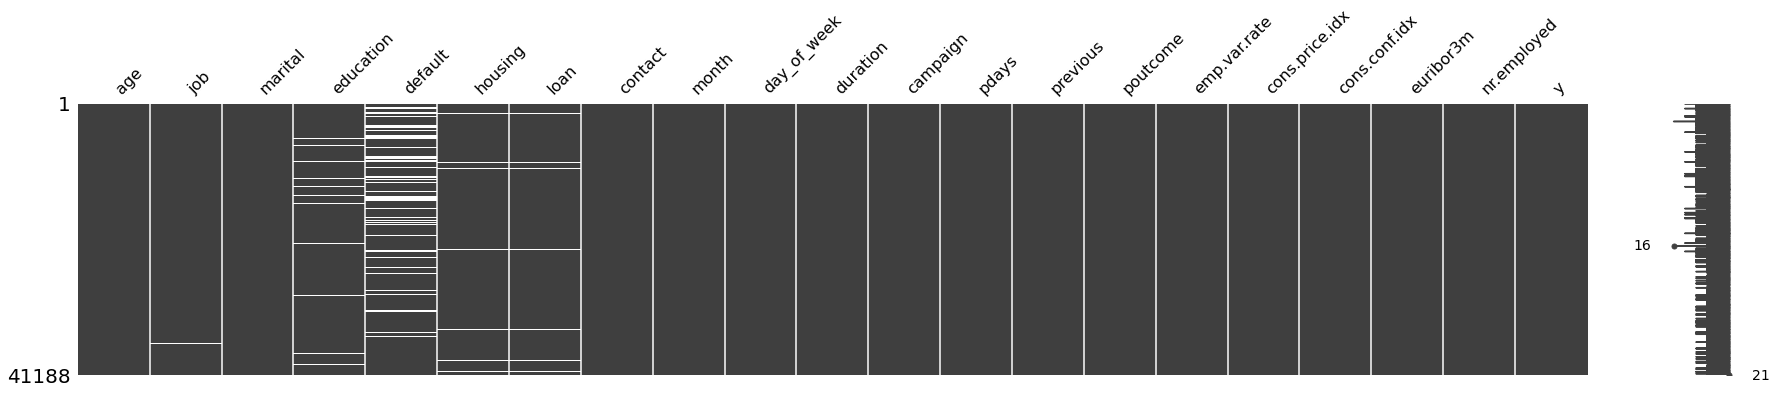

In [6]:
# How many missing values are there in our dataset?

missingno.matrix(data, figsize = (30,5))

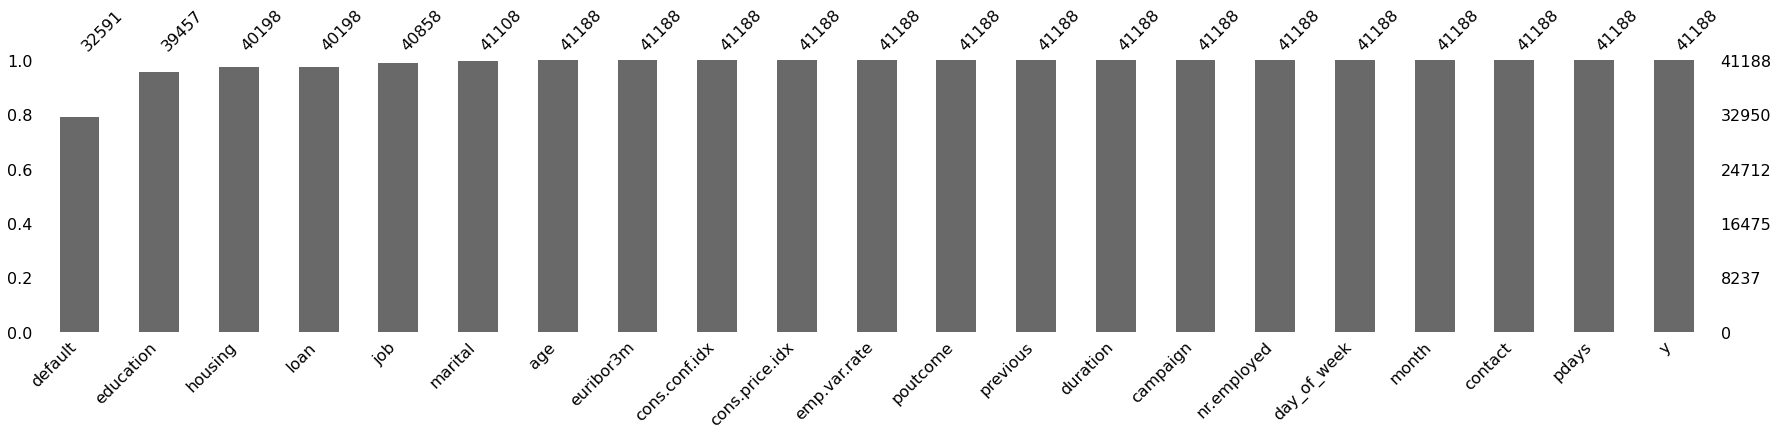

In [7]:
missingno.bar(data, sort='ascending', figsize = (30,5))

The purpose of creating a new dataset that contains all the values that are unknown and replace them with nan values give us the real picture of where data is missing. 
One way to clean dataset is to delete it, but it gives a bad image of the data and it is unrealistic. Another way is to find some correlation between the data and fill it in.

One way to fill in such data is with the statistical method fashion, where the most dominant feature is filled.


### Categorical variables:

In [8]:
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['job'] = data['job'].fillna(data['job'].mode()[0])
data['marital'] = data['marital'].fillna(data['marital'].mode()[0])
data['housing'] = data['housing'].fillna(data['housing'].mode()[0])
data['default'] = data['default'].fillna(data['default'].mode()[0])

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Numeric variables

In [10]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
data[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


We know that the missing values, or NaNs, in numeric variables are encoded as '999'. From the above table, it is clear that only 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.

Helper Methods 

In [11]:
def make_one_hot_encoding(fields, data):
  """ Note : this method doesn't remove the original fields"""
  data_new = data.copy()
  for field in fields:
      one_hot_converted = pd.get_dummies(data[field], prefix=field, drop_first=False)
      data_new = pd.concat([data_new, one_hot_converted], axis=1)
  return data_new

def drop_fields(fields, data):
  data_new = data.copy()
  data_new = data_new.drop(fields, axis=1)
  return data_new


In [12]:
# one hot encoding here
fields = data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
data_one_hot = make_one_hot_encoding(fields, data)

In [13]:
#drop fields that are one hot encoded
fields = data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays']]
data_drop = drop_fields(fields, data_one_hot)

In [14]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 57 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null object
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employe

In [15]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

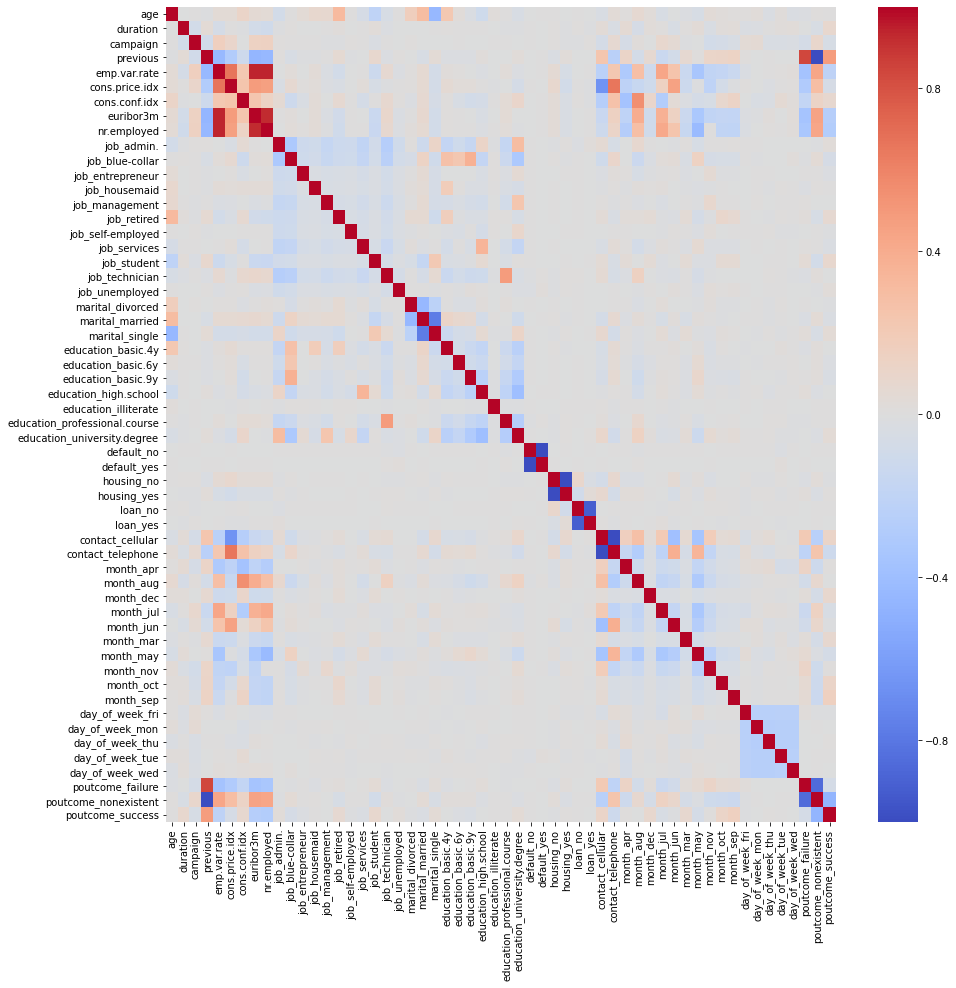

In [16]:
drawheatmap(data_drop)

### Feature Importance

Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

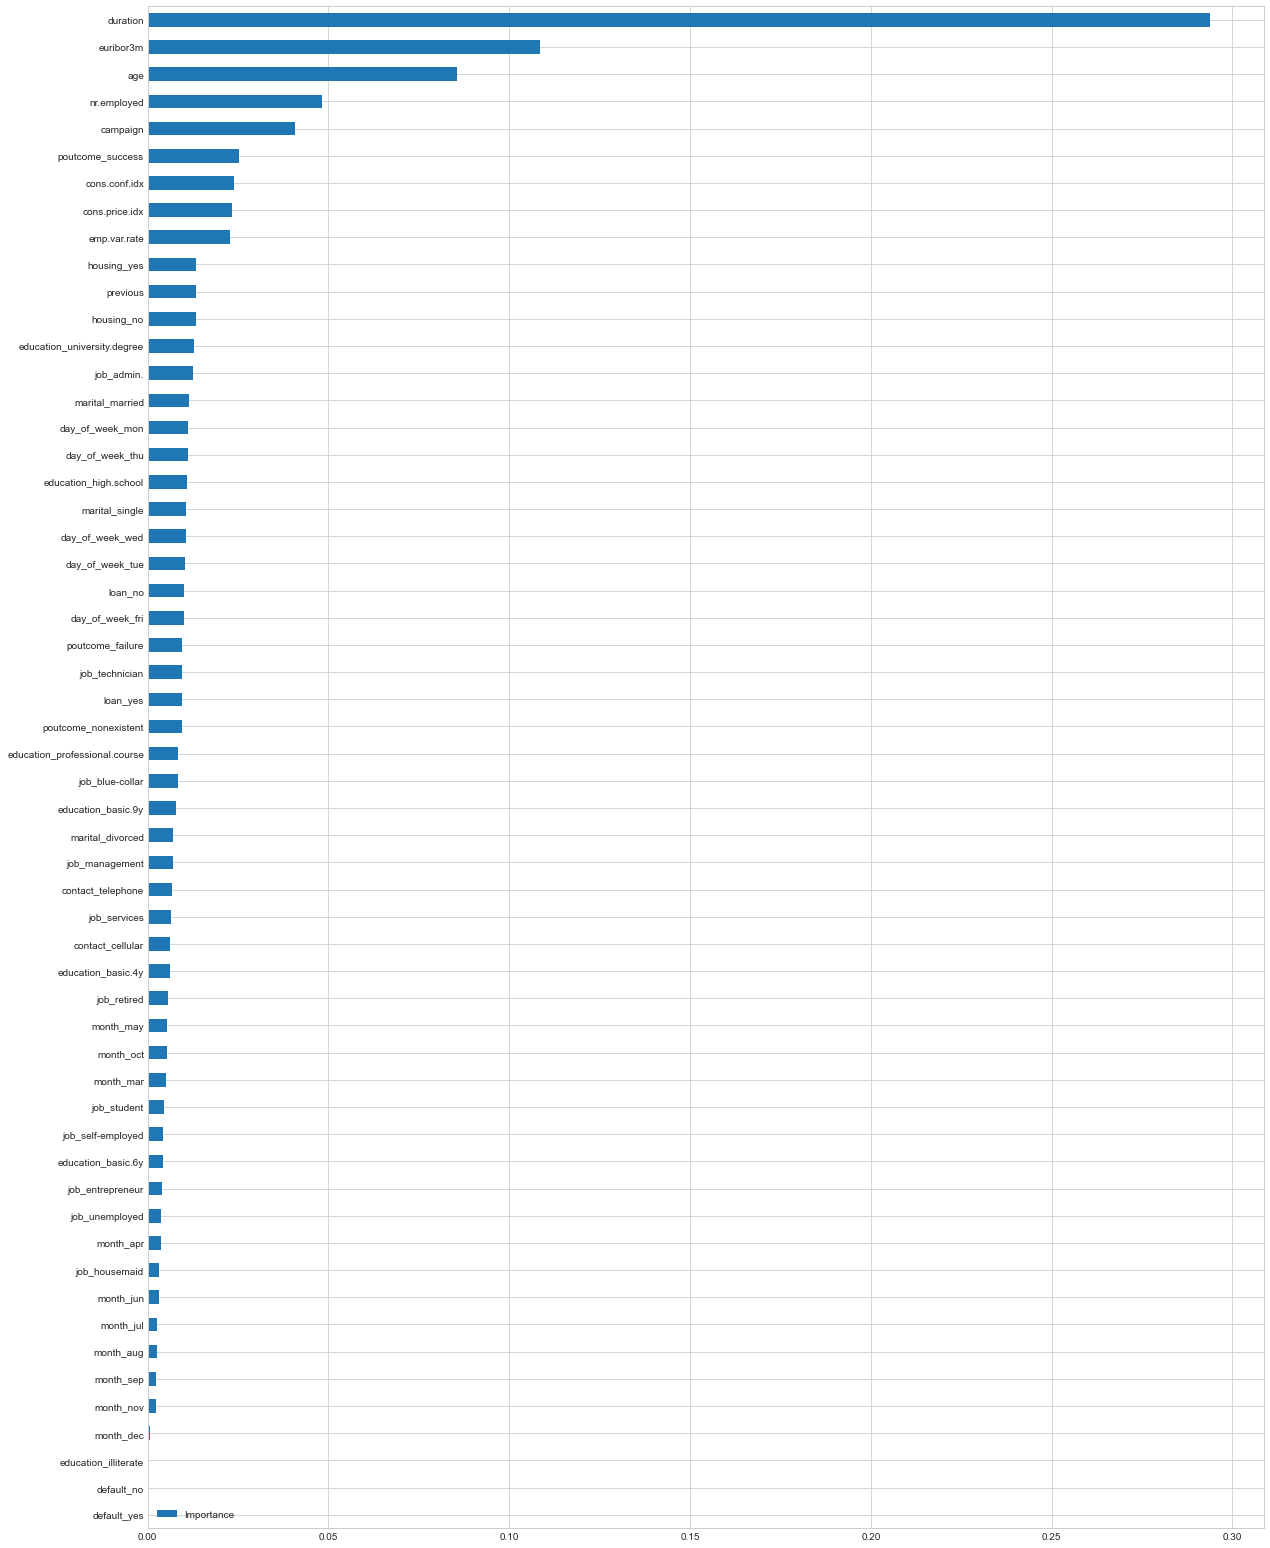

In [17]:
# Using Random Forest to gain an insight on Feature Importance

clf = RandomForestClassifier()
clf.fit(data_drop.drop('y', axis=1), data_drop['y'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data_drop.drop('y', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

## PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

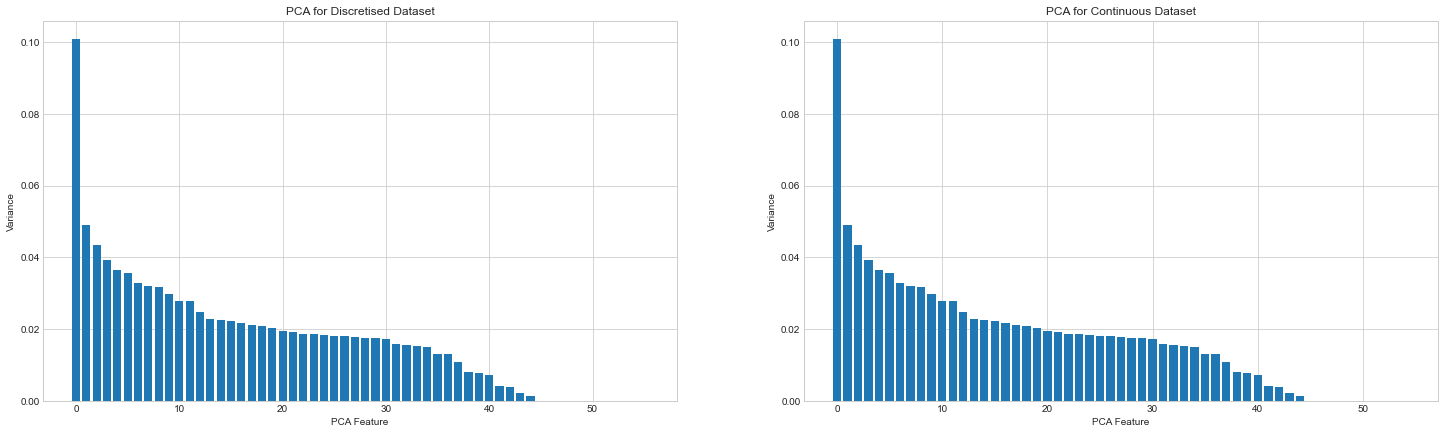

In [18]:
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
pca1 = PCA(n_components=len(data_drop.columns)-1)
fit1 = pca1.fit(X)

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
pca2 = PCA(n_components=len(data_drop.columns)-2)
fit2 = pca2.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

plt.subplot(1, 2, 2)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit2.explained_variance_ratio_.size), fit2.explained_variance_ratio_);

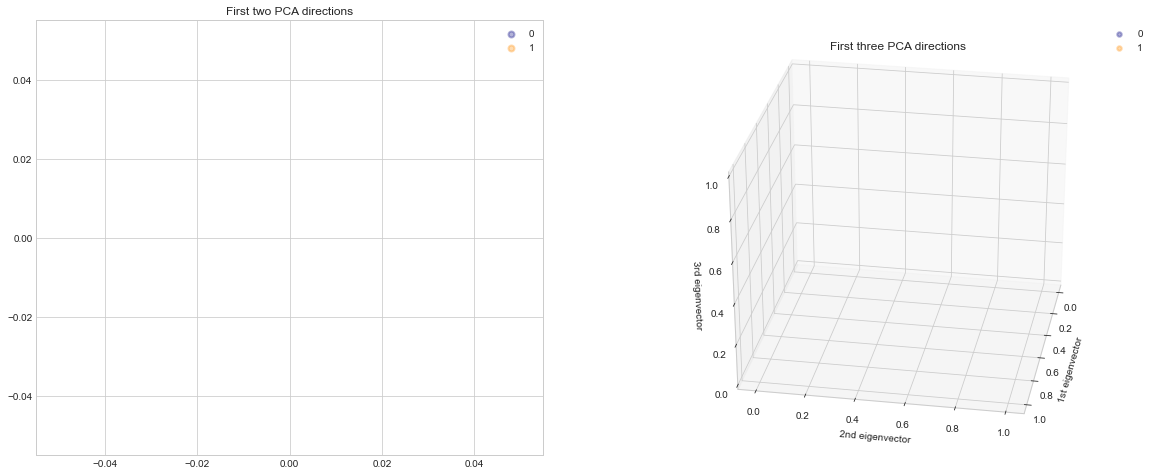

In [19]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
y = data_drop['y']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

### Recursive Feature Elimination

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

Optimal number of features : 56


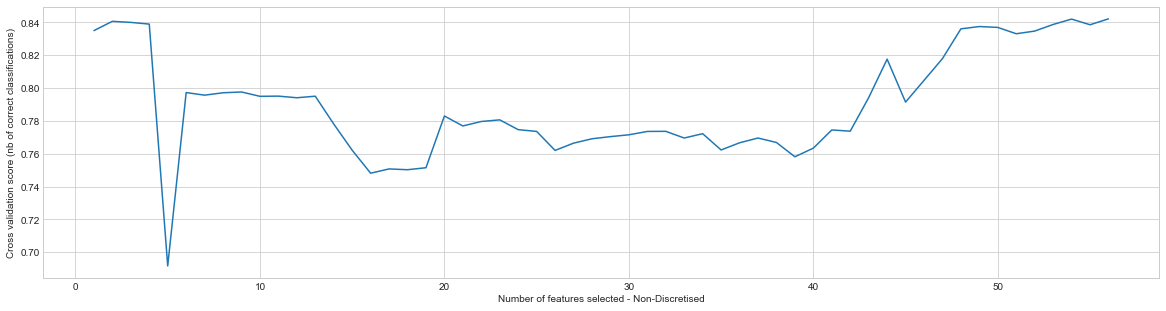

In [20]:
# Calculating RFE for non-discretised dataset, and graphing the Importance for each feature, per dataset

selector1 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector1 = selector1.fit(data_drop.drop('y', axis=1).values, data_drop['y'].values)
#print("Feature Ranking For Non-Discretised: %s" % selector1.ranking_)
print("Optimal number of features : %d" % selector1.n_features_)
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_);

# Feature space could be subsetted like so:
data_drop = data_drop[data_drop.columns[np.insert(selector1.support_, 0, True)]]

### Model Build

Train Test Split

In [21]:
data_drop['y'].replace({"no":0, "yes":1}, inplace=True)

In [22]:
data_drop['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [23]:
# get the target variable... create X and y
y = data_drop[['y']]
X = data_drop.drop(['y'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (32950, 56)
X Test: (8238, 56)
Y Train: (32950, 1)
Y Test: (8238, 1)


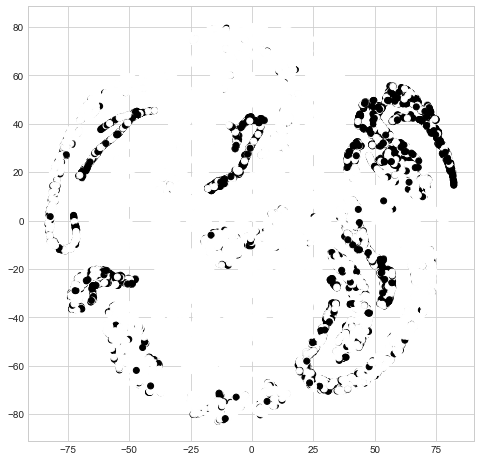

In [25]:
#Visualize data with T-SNE plot
%matplotlib inline

# T-SNE plot for train dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()


### Algorithms

From here, we will be running the following algorithms.

- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees
- BaggingClassifier
- AdaBoostClassifier 
- VotingClassifier

Because there's a great deal of repetitiveness on the code for each, we'll create a custom function to analyse this.

For some algorithms, we have also chosen to run a Random Hyperparameter search and GridSearch for Hyperparameters, to select the best hyperparameters for a given algorithm.

In [71]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier,
                          BaggingClassifier,
                          AdaBoostClassifier,
                          
                          ))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [32]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [27]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores

def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 6.86 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.888 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.1598623219728096e-16, 'class_weight': None, 'C': 8.332821508477356e-13}

Model with rank: 2
Mean validation score: 0.851 (std: 0.006)
Parameters: {'penalty': 'l2', 'intercept_scaling': 2.6628244394072807e-07, 'class_weight': 'balanced', 'C': 813937.502255503}

Model with rank: 3
Mean validation score: 0.851 (std: 0.006)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.9249898452225283e-16, 'class_weight': 'balanced', 'C': 0.0015195611157889915}

Model with rank: 4
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 186692603741.45856, 'class_weight': None, 'C': 1.4764438042522974e-08}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 3.5347185209496995e-17, 'class_weight': None, 'C': 4822456588446.656}

In [28]:
# Logistic Regression

start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 90.86
Accuracy CV 10-Fold: 90.84
Running Time: 0:00:10.635765


In [29]:
from sklearn.metrics import classification_report
print (metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29261
           1       0.65      0.39      0.49      3689

    accuracy                           0.91     32950
   macro avg       0.79      0.68      0.72     32950
weighted avg       0.90      0.91      0.90     32950



In [30]:
print (metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7287
           1       0.68      0.39      0.49       951

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



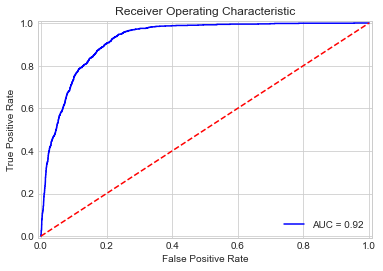

In [33]:
plot_roc_curve(y_test, probs_log)

In [34]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 89.54
Accuracy CV 10-Fold: 89.65
Running Time: 0:00:12.810528


In [35]:
print (metrics.classification_report(y_train, train_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     29261
           1       0.54      0.47      0.50      3689

    accuracy                           0.90     32950
   macro avg       0.74      0.71      0.72     32950
weighted avg       0.89      0.90      0.89     32950



In [36]:
print (metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7287
           1       0.56      0.46      0.51       951

    accuracy                           0.90      8238
   macro avg       0.74      0.71      0.72      8238
weighted avg       0.89      0.90      0.89      8238



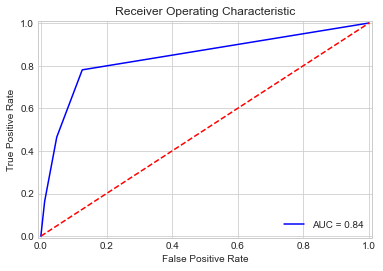

In [37]:
plot_roc_curve(y_test, probs_knn)

In [38]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 85.26
Accuracy CV 10-Fold: 85.52
Running Time: 0:00:00.732674


In [39]:
print (metrics.classification_report(y_train, train_pred_gaussian))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     29261
           1       0.39      0.55      0.46      3689

    accuracy                           0.86     32950
   macro avg       0.67      0.72      0.69     32950
weighted avg       0.88      0.86      0.87     32950



In [40]:
print (metrics.classification_report(y_test, test_pred_gaussian))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7287
           1       0.39      0.52      0.45       951

    accuracy                           0.85      8238
   macro avg       0.66      0.71      0.68      8238
weighted avg       0.87      0.85      0.86      8238



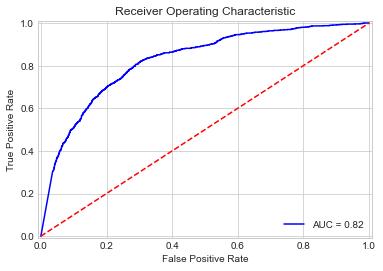

In [41]:
plot_roc_curve(y_test, probs_gau)

In [42]:
# Linear SVC

start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))


Accuracy: 89.27
Accuracy CV 10-Fold: 86.69
Running Time: 0:01:14.910526


In [43]:
print (metrics.classification_report(y_train, train_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     29261
           1       0.37      0.28      0.32      3689

    accuracy                           0.87     32950
   macro avg       0.64      0.61      0.62     32950
weighted avg       0.85      0.87      0.86     32950



In [44]:
print (metrics.classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7287
           1       0.70      0.12      0.21       951

    accuracy                           0.89      8238
   macro avg       0.80      0.56      0.58      8238
weighted avg       0.87      0.89      0.86      8238



In [45]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 88.72
Accuracy CV 10-Fold: 89.12
Running Time: 0:00:16.152565


In [46]:
print (metrics.classification_report(y_train, train_pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     29261
           1       0.55      0.16      0.25      3689

    accuracy                           0.89     32950
   macro avg       0.73      0.57      0.60     32950
weighted avg       0.86      0.89      0.86     32950



In [47]:
print (metrics.classification_report(y_test, test_pred_sgd))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7287
           1       0.67      0.05      0.08       951

    accuracy                           0.89      8238
   macro avg       0.78      0.52      0.51      8238
weighted avg       0.86      0.89      0.84      8238



In [48]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 88.74
Accuracy CV 10-Fold: 89.07
Running Time: 0:00:03.024833


In [49]:
print (metrics.classification_report(y_train, train_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     29261
           1       0.51      0.53      0.52      3689

    accuracy                           0.89     32950
   macro avg       0.73      0.73      0.73     32950
weighted avg       0.89      0.89      0.89     32950



In [50]:
print (metrics.classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7287
           1       0.51      0.49      0.50       951

    accuracy                           0.89      8238
   macro avg       0.72      0.71      0.72      8238
weighted avg       0.89      0.89      0.89      8238



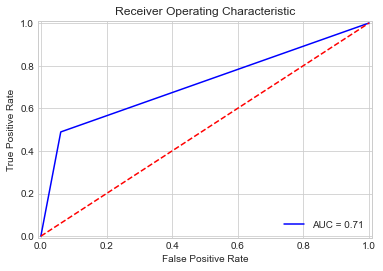

In [51]:
plot_roc_curve(y_test, probs_dt)

In [52]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores

def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV took 9.62 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.913 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 19}

Model with rank: 2
Mean validation score: 0.912 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 11}

Model with rank: 3
Mean validation score: 0.909 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 7, 'min_samples_split': 16}

Model with rank: 4
Mean validation score: 0.909 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 3}

Model with rank: 5
Mean validation score: 0.906 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_de

In [53]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 90.74
Accuracy CV 10-Fold: 91.17
Running Time: 0:00:03.955934


In [54]:
print (metrics.classification_report(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29261
           1       0.65      0.46      0.54      3689

    accuracy                           0.91     32950
   macro avg       0.79      0.71      0.74     32950
weighted avg       0.90      0.91      0.90     32950



In [55]:
print (metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7287
           1       0.65      0.43      0.52       951

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



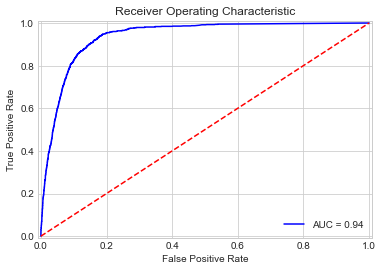

In [56]:
plot_roc_curve(y_test, probs_rf)

In [57]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 91.49
Accuracy CV 10-Fold: 91.65
Running Time: 0:01:02.911998


In [58]:
print (metrics.classification_report(y_train, train_pred_gbt))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     29261
           1       0.66      0.52      0.58      3689

    accuracy                           0.92     32950
   macro avg       0.80      0.74      0.77     32950
weighted avg       0.91      0.92      0.91     32950



In [59]:
print (metrics.classification_report(y_test, test_pred_gbt))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7287
           1       0.67      0.51      0.58       951

    accuracy                           0.91      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



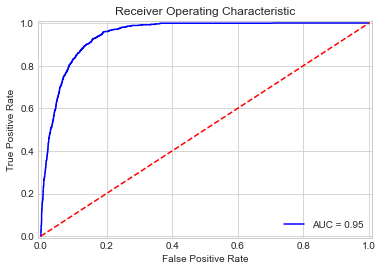

In [60]:
plot_roc_curve(y_test, probs_gbt)

In [61]:
# BaggingClassifier

start_time = time.time()
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100)
train_pred_bc, test_pred_bc, acc_bc, acc_cv_bc, probs_bc = fit_ml_algo(BaggingClassifier(base_estimator=dt_model, n_estimators=100,random_state=100), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
bc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_bc)
print("Accuracy CV 10-Fold: %s" % acc_cv_bc)
print("Running Time: %s" % datetime.timedelta(seconds=bc_time))

Accuracy: 90.97
Accuracy CV 10-Fold: 91.25
Running Time: 0:03:03.545358


In [62]:
print (metrics.classification_report(y_train, train_pred_bc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29261
           1       0.63      0.53      0.58      3689

    accuracy                           0.91     32950
   macro avg       0.79      0.75      0.76     32950
weighted avg       0.91      0.91      0.91     32950



In [63]:
print (metrics.classification_report(y_test, test_pred_bc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7287
           1       0.63      0.52      0.57       951

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



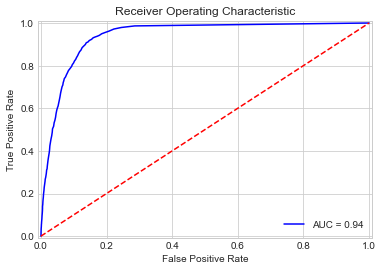

In [64]:
plot_roc_curve(y_test, probs_bc)

In [65]:
# AdaBoostClassifier 
start_time = time.time()
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100)
train_pred_abcl, test_pred_abcl, acc_abcl, acc_cv_abcl, probs_abcl = fit_ml_algo(AdaBoostClassifier(base_estimator=dt_model, n_estimators=100,random_state=100), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
abcl_time = (time.time() - start_time)
print("Accuracy: %s" % acc_abcl)
print("Accuracy CV 10-Fold: %s" % acc_cv_abcl)
print("Running Time: %s" % datetime.timedelta(seconds=abcl_time))

Accuracy: 89.17
Accuracy CV 10-Fold: 88.9
Running Time: 0:00:02.891167


In [66]:
print (metrics.classification_report(y_train, train_pred_abcl))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     29261
           1       0.50      0.50      0.50      3689

    accuracy                           0.89     32950
   macro avg       0.72      0.72      0.72     32950
weighted avg       0.89      0.89      0.89     32950



In [67]:
print (metrics.classification_report(y_test, test_pred_abcl))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7287
           1       0.53      0.51      0.52       951

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



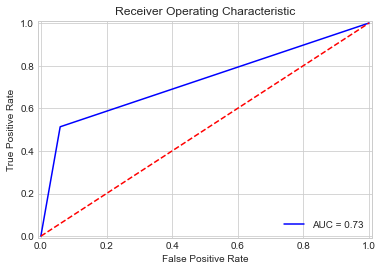

In [68]:
plot_roc_curve(y_test, probs_abcl)

In [72]:
#Multiple model Ensemble - VotingClassifier
LR=LogisticRegression()
NB=GaussianNB()
SVM=svm.SVC()

start_time = time.time()

train_pred_vot, test_pred_vot, acc_vot, acc_cv_vot, _ = fit_ml_algo(VotingClassifier(estimators=[('LR',LR),('NB',NB),('SVM',SVM)],voting='hard'), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
vot_time = (time.time() - start_time)
print("Accuracy: %s" % acc_vot)
print("Accuracy CV 10-Fold: %s" % acc_cv_vot)
print("Running Time: %s" % datetime.timedelta(seconds=vot_time))

Accuracy: 90.23
Accuracy CV 10-Fold: 90.58
Running Time: 0:05:10.046792


In [73]:
print (metrics.classification_report(y_train, train_pred_vot))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29261
           1       0.67      0.32      0.43      3689

    accuracy                           0.91     32950
   macro avg       0.79      0.65      0.69     32950
weighted avg       0.89      0.91      0.89     32950



In [74]:
print (metrics.classification_report(y_test, test_pred_vot))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7287
           1       0.68      0.29      0.41       951

    accuracy                           0.90      8238
   macro avg       0.80      0.64      0.68      8238
weighted avg       0.89      0.90      0.88      8238



In [76]:
#Multiple model Ensemble - VotingClassifier - GridSearch for Hyperparameters

start_time = time.time()
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft')
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}


train_pred_gs, test_pred_gs, acc_gs, acc_cv_gs, probs_gs = fit_ml_algo(GridSearchCV(estimator=eclf, param_grid=params, cv=5), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gs_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gs)
print("Accuracy CV 10-Fold: %s" % acc_cv_gs)
print("Running Time: %s" % datetime.timedelta(seconds=gs_time))


Accuracy: 90.14
Accuracy CV 10-Fold: 90.24
Running Time: 0:13:57.885445


In [77]:
print (metrics.classification_report(y_train, train_pred_gs))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     29261
           1       0.57      0.51      0.54      3689

    accuracy                           0.90     32950
   macro avg       0.76      0.73      0.74     32950
weighted avg       0.90      0.90      0.90     32950



In [78]:
print (metrics.classification_report(y_test, test_pred_gs))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7287
           1       0.59      0.49      0.54       951

    accuracy                           0.90      8238
   macro avg       0.76      0.72      0.74      8238
weighted avg       0.90      0.90      0.90      8238



### Results

In [80]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'BaggingClassifier', 'AdaBoostClassifier',
              'Multiple model Ensemble - Voting',
              'Multiple model Ensemble - Voting - GridSearch'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_bc,
        acc_abcl,
        acc_vot,
        acc_gs
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,91.49
8,BaggingClassifier,90.97
1,Logistic Regression,90.86
2,Random Forest,90.74
10,Multiple model Ensemble - Voting,90.23
11,Multiple model Ensemble - Voting - GridSearch,90.14
0,KNN,89.54
5,Linear SVC,89.27
9,AdaBoostClassifier,89.17
6,Decision Tree,88.74


In [81]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'BaggingClassifier', 'AdaBoostClassifier',
              'Multiple model Ensemble - Voting',
              'Multiple model Ensemble - Voting - GridSearch'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_bc,
        acc_cv_abcl,
        acc_cv_vot,
        acc_cv_gs
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,91.65
8,BaggingClassifier,91.25
2,Random Forest,91.17
1,Logistic Regression,90.84
10,Multiple model Ensemble - Voting,90.58
11,Multiple model Ensemble - Voting - GridSearch,90.24
0,KNN,89.65
4,Stochastic Gradient Decent,89.12
6,Decision Tree,89.07
9,AdaBoostClassifier,88.90


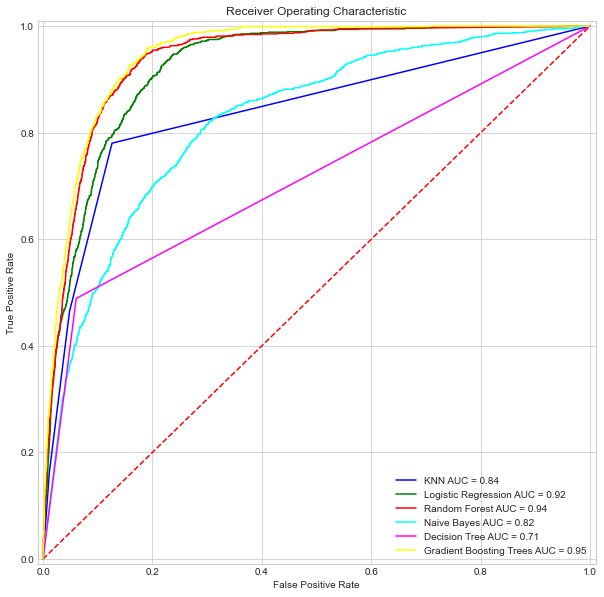

In [82]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow'
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()